In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe
from adjustText import adjust_text

In [2]:
df = pd.read_csv("dm-data.csv")

df['Player'] = df['Player'].str.split('\\', expand=True)[0]

df = df.drop(21)

# #Make a copy of the dataframe only with the rows I want
# df2 = df[['Player','Pos','90s','Completed','Attempted','Progressive Distance','Key Passes','Prog']].copy()
# df2.rename(columns = {'Key Passes':'KP'}, inplace = True)
# #Create a total to sort the data
# df2['Total'] = df2[['KP','Prog']].sum(axis=1)
# df2 = df2.sort_values(by=['Total'],ascending=False)

# df2 = df2[(df['Pos'] == 'MF')]
# df2 = df2[(df2['90s'] > 10)]
# df2 = df2[(df2['Total'] > 2)]
# #Edit the player names so they look nice. 
# df2['Player'] = df['Player'].str.split('\\', expand=True)[0]



df

,Player,Pos,CompetedPasses,AttemptedPasses,PassCmpPercent,KeyPasses,Pass3rd,PassesPA,ProgPasses,xA,...,AttDribbles,DribbleSuccessPercent,NoPlayersDribbled,Megs,Carries,CarriesTotalDist,CarriesPrgDist,ProgCarries,Carries3rd,CarriesPA
0,Allan,MF,39.4,46.0,85.8,0.70,3.99,0.66,3.60,0.04,...,1.89,65.1,1.27,0.04,35.5,217.1,128.7,4.21,1.40,0.09
1,Bissouma,MF,42.2,48.4,87.2,0.43,3.55,0.61,3.29,0.03,...,2.20,65.8,1.53,0.09,42.5,258.4,118.3,4.54,1.79,0.06
2,Mohamed Elneny,MF,54.5,58.3,93.4,0.23,4.48,0.52,3.49,0.01,...,0.52,77.8,0.41,0.06,48.7,228.9,115.2,4.07,0.99,0.00
3,Fabinho,DFMF,65.5,71.9,91.1,0.11,3.86,0.56,3.58,0.01,...,0.32,55.6,0.21,0.00,52.9,262.6,147.9,5.47,0.91,0.07
4,Fernandinho,MF,66.5,75.8,87.7,0.91,10.20,1.29,7.27,0.07,...,1.14,66.7,0.98,0.00,60.1,305.7,184.6,10.20,3.18,0.38
5,Fred,MF,58.5,66.3,88.2,0.90,6.54,0.68,5.60,0.09,...,1.20,75.0,1.09,0.04,52.1,247.1,119.1,4.36,1.50,0.08
6,André Gomes,MF,43.1,51.8,83.2,0.86,4.71,0.75,4.60,0.06,...,2.36,63.4,1.61,0.06,45.7,224.9,107.7,5.00,1.44,0.17
7,Højbjerg,MF,62.9,70.7,88.9,0.45,6.18,0.53,5.08,0.05,...,1.00,65.8,0.68,0.05,54.2,241.3,114.1,3.87,0.68,0.13
8,Jorginho,MF,69.9,78.0,89.5,1.08,6.28,0.90,5.16,0.09,...,1.12,72.0,0.90,0.00,59.7,241.6,129.6,4.57,1.26,0.09
9,Kanté,MF,54.7,63.2,86.6,0.88,4.16,0.50,4.24,0.05,...,1.60,76.3,1.22,0.04,47.7,230.4,126.0,4.71,1.60,0.17


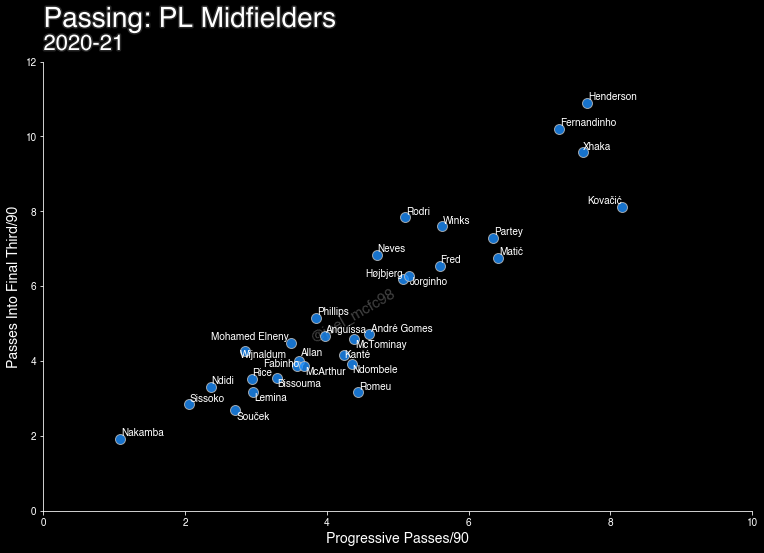

In [3]:
line_color = "silver"
marker_color = "dodgerblue"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(df["ProgPasses"], df["Pass3rd"], s=100, zorder=5, 
               ec=line_color, fc=marker_color, alpha=0.8)
    
    ax.text(0.5, 0.5, '@joel_mcfc98', transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='right', va='top', rotation='30')
    
    texts = [] ##plot player names
    for row in df.itertuples():
        texts.append(ax.text(row.ProgPasses, row.Pass3rd, row.Player, fontsize=10, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Progressive Passes/90", ylabel="Passes Into Final Third/90", ylim=(0, 12), xlim=(0, 10)) ## set labels and limits
    
  
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
#     ax.xaxis.set_ticks(range(-1, 11, 5)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Passing: PL Midfielders", 
            ha='left', fontsize=28, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="2020-21", ha='left', 
            fontsize=22, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("dm-passing", dpi=180)

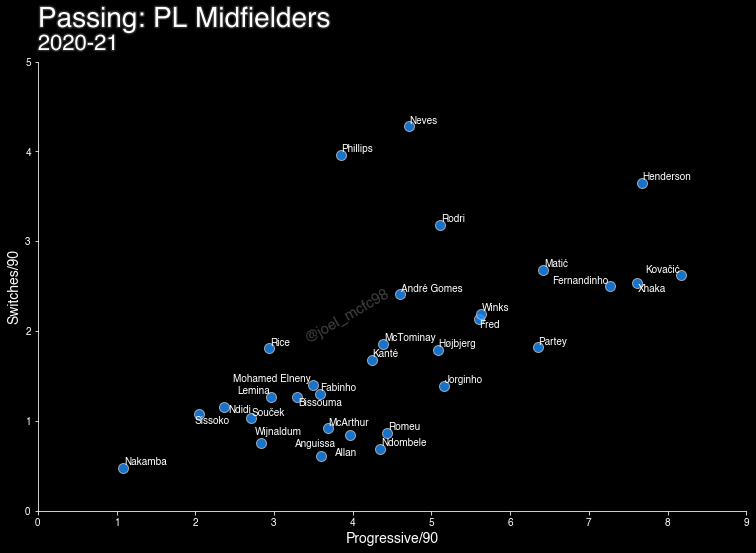

In [4]:
line_color = "silver"
marker_color = "dodgerblue"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(df["ProgPasses"], df["Switches"], s=100, zorder=5, 
               ec=line_color, fc=marker_color, alpha=0.8)
    
    ax.text(0.5, 0.5, '@joel_mcfc98', transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='right', va='top', rotation='30')
    
    texts = [] ##plot player names
    for row in df.itertuples():
        texts.append(ax.text(row.ProgPasses, row.Switches, row.Player, fontsize=10, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Progressive/90", ylabel="Switches/90", ylim=(0, 5), xlim=(0, 9))
    
  
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
#     ax.xaxis.set_ticks(range(-1, 11, 5)) ##fix the tick frequency 
    
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Passing: PL Midfielders", 
            ha='left', fontsize=28, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="2020-21", ha='left', 
            fontsize=22, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("dm-passing-2", dpi=180)

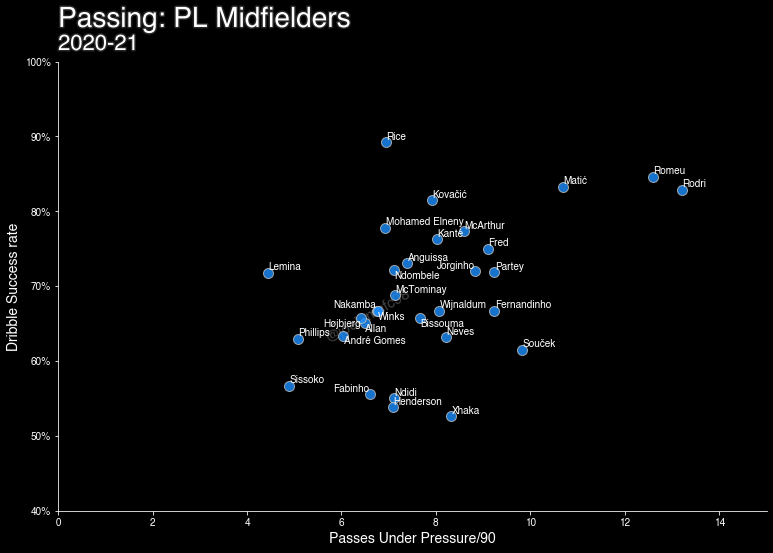

In [5]:
line_color = "silver"
marker_color = "dodgerblue"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(df["PassesUnderPressure"], df["DribbleSuccessPercent"], s=100, zorder=5, 
               ec=line_color, fc=marker_color, alpha=0.8)
    
    ax.text(0.5, 0.5, '@joel_mcfc98', transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='right', va='top', rotation='30')
    
    texts = [] ##plot player names
    for row in df.itertuples():
        texts.append(ax.text(row.PassesUnderPressure, row.DribbleSuccessPercent, row.Player, fontsize=10, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Passes Under Pressure/90", ylabel="Dribble Success rate", ylim=(40, 100), xlim=(0, 15))
    
  
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
#     ax.xaxis.set_ticks(range(-1, 11, 5)) ##fix the tick frequency 
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Passing: PL Midfielders", 
            ha='left', fontsize=28, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="2020-21", ha='left', 
            fontsize=22, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("dm-passing-1", dpi=180)